# Capítulo 1

## Encontrando Conectores-Chave

In [2]:
users = [{"id":0, "name":"Hero"},
         {"id":1, "name":"Dunn"},
         {"id":2, "name":"Sue"},
         {"id":3, "name":"Chi"},
         {"id":4, "name":"Thor"},
         {"id":5, "name":"Clive"},
         {"id":6, "name":"Hicks"},
         {"id":7, "name":"Devin"},
         {"id":8, "name":"Kate"},
         {"id":9, "name":"Klein"}]

In [3]:
friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

Para a primeira tupla (0,1) temos a indicação que o `id` 0 (Hero) e o `id` 1 (Dunn) são amigos.

Podemos criar uma lista de amigos para cada usuário

In [4]:
# Criando uma lista vazia para cada user
for user in users:
    user["friends"] = []

Povoando a lista de amigos de cada user

In [5]:
for i, j in friendships:
    users[i]["friends"].append(users[j]) # Adicionando i como amigo de j
    users[j]["friends"].append(users[i]) # Adicionando j como amigo de i

Qual é o número médio de conexões?

Primeiro precisamos saber o número total de conexões, uma vez que a media sera o total de conexões divido pelo total de users.

In [6]:
def number_of_friends(user):
    return len(user["friends"])
total_connections = sum(number_of_friends(user) for user in users)

In [7]:
num_users = len(users)
avg_connections = total_connections // num_users # Divisão inteira
avg_connections

2

O número médio é 2 conecxões por pessoa. 
Podemos saber quais pessoas são mais conectadas

In [8]:
# cria uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

Ordenando 

In [9]:
sorted(num_friends_by_id, key=lambda num_friends_by_id:num_friends_by_id[1], reverse=True)
# É ordenado por num_friends_by_id[1] do maior para o menor

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

Temos uma lista com os `id` e o números de amigos

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

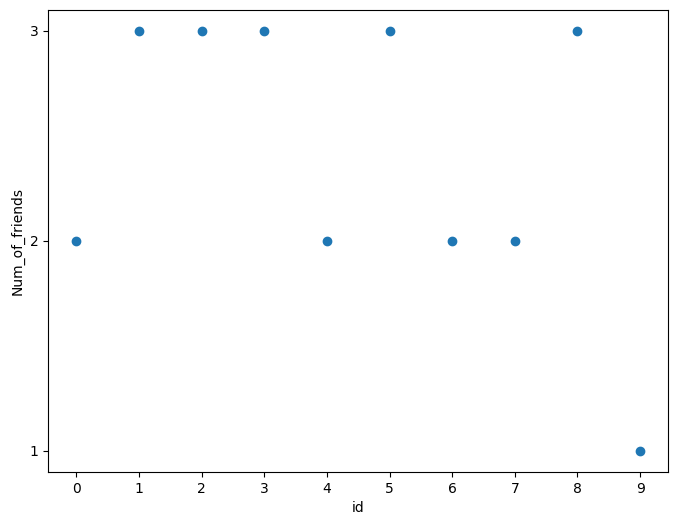

In [11]:
plt.figure(figsize=(8,6))
x, y = zip(*num_friends_by_id)

# Plotar os pontos
plt.scatter(x, y)
plt.xlabel('id')
plt.ylabel('Num_of_friends')
plt.xticks(np.linspace(min(x), max(x), 10))

# Ajustar os ticks do eixo y para intervalos unitários
plt.yticks(np.arange(min(y), max(y)+1, 1))
plt.show()

## Cientistas de Dados que você talvez conheça

Para aumentar a relação, podemos propor que o usuário conheça os amigos de amigos.

In [12]:
def friends_of_friend_ids_bad(user):
    # foaf é a abreviação
    return [foaf["id"]
        for friend in user["friends"]  # para cada amigo do user
        for foaf in friend["friends"]] # pega cada _their_friends


Vamos olhar quantos amigos o user 0 tem.

In [30]:
len(users[0]['friends']) # Indica que o User 0 tem dois amigos.

2

Para saber quais são esses amigos, podemos olhar a lista de friendships que nos indica que o user 0 é amigo do user 1 e 2.

In [32]:
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [24]:
friends_of_friend_ids_bad(users[0]) # user Hero

[0, 2, 3, 0, 1, 3]

O user 0 (Hero) aparece duas vezes, uma vez que ele é amigo de amos seus amigos.
Inclui também os os users 1 e 2, pois são amigos do user 0.
Mas inclui o user 3 duas vezes, pois ele é amigo dos users 1 e 2. 
Este resultado nos indica que por meio dos amigos 1 e 2, o user 0 pode chegar ao amigo 3, estendendo a relação de amizades.

De forma mais claras, podemos visualizar essas amizades por meio do

In [39]:
print([friend['id'] for friend in users[0]['friends']])

[1, 2]


Ou para todos os users

In [62]:
len(users)

10

In [63]:
for user in range(0,len(users)):
    print(f' Os ammigos do user {user} são os users:', end=' ')
    for friend in users[user]['friends']:
        print(f'{friend['id']}', end=' ')
    print()
    

 Os ammigos do user 0 são os users: 1 2 
 Os ammigos do user 1 são os users: 0 2 3 
 Os ammigos do user 2 são os users: 0 1 3 
 Os ammigos do user 3 são os users: 1 2 4 
 Os ammigos do user 4 são os users: 3 5 
 Os ammigos do user 5 são os users: 4 6 7 
 Os ammigos do user 6 são os users: 5 8 
 Os ammigos do user 7 são os users: 5 8 
 Os ammigos do user 8 são os users: 6 7 9 
 Os ammigos do user 9 são os users: 8 


Voutando a lista de amigos de amigos, notamos que alguns valores aparecem repetidos.
Saber quantos amigos-de-amigos temos é interessante, contudo temos que remover os repetidos.

In [64]:
from collections import Counter

In [65]:
def not_the_same(user, other_user): # Usamos para podermos distinguir os usuários
    return user['id'] != other_user['id']

In [67]:
def not_friend(user, other_user):
    # other_user não é amigo se não está em user['friends'];
    # isto é, se not_the_same com todos as pessoas em user['friends'], para pegar apenas amigos-de-amigos distintos
    return all(not_the_same(friend, other_user)
               for friend in user['friends'])

In [68]:
def friends_of_friends_ids(user):
    return Counter(foaf['id']
                   for friend in user['friends'] # para cada um dos meus amigos
                   for foaf in friend['friends'] # que contam *their* amigos
                   if not_the_same(user,foaf)    # que não seja eu
                   and not_friend(user,foaf))    # e que não são meus amigos

In [70]:
print(friends_of_friends_ids(users[3]))

Counter({0: 2, 5: 1})


Este resultado indca que  Chi (user 3) possui dois amigos em comum com o Hero (user 0) mas somente um amigo em comum com Clive (user 5).